<b>`Import Libraries`</b>

In [278]:
# Import all the libraries for Data Analysis, Visualisation, Random Forest & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
# For building logistic regression model
import statsmodels.api as sm
from sklearn.cluster import KMeans
from kneed import KneeLocator
# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
                        
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Importing the PCA module
from sklearn.decomposition import PCA

# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

<b>`TASK 2: USER ENGAGEMENT ANALYSIS`
    
    Track the user’s engagement using the following engagement metrics:

        1. sessions frequency
        2. the duration of the session
        3. the sessions total traffic (download and upload (bytes))

In [281]:
data = pd.read_csv('../data/Task1_clean_data.csv')
data.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,36749741.0,308879636.0,1.570185,2.905912,3.701304,18.355943,17.855187,292.426453,180.558843,345.629377
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1.933278,4.414096,0.937385,39.359124,35.565545,609.920783,541.959383,707.185356
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1.726277,10.229119,3.363124,34.425237,23.751202,229.980251,414.908351,307.690973
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,0.657493,11.811761,2.070983,36.534765,15.092588,810.387875,761.837216,889.352748
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,0.912788,7.748843,2.110349,34.222253,17.539799,531.237049,564.619822,607.681403


In [301]:
df = data.copy()

In [302]:
df.dtypes

bearer_id     float64
start          object
start_ms      float64
end            object
end_ms        float64
               ...   
youtube       float64
netflix       float64
gaming        float64
other         float64
total_data    float64
Length: 63, dtype: object

In [303]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns
print(len(numeric_cols))

58


In [304]:
df.isna().sum()

bearer_id     0
start         0
start_ms      0
end           0
end_ms        0
             ..
youtube       0
netflix       0
gaming        0
other         0
total_data    0
Length: 63, dtype: int64

<b>`2.1.1 - 
    Top 10 customers per engagement metric`</b>
    
   `How often do customers use diffrent apps?
    What is the average usage of apps per customer per app`

In [305]:
df.columns = [column.replace(' ', '_').lower() for column in df.columns]

<i>`Top 10 customers per session freuency`</i>

In [306]:
top10_customers_by_session=df.groupby('msisdn/number').agg({'bearer_id':'count'}).reset_index().sort_values('bearer_id',ascending=False).head(10)
top10_customers_by_session

,msisdn/number,bearer_id
53644,3.366371e+10,1067
13526,3.362632e+10,18
6437,3.361489e+10,17
13180,3.362578e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
1279,3.360452e+10,12
92577,3.376041e+10,12


Text(0.5, 1.0, 'Top 10 customers by session frequency')

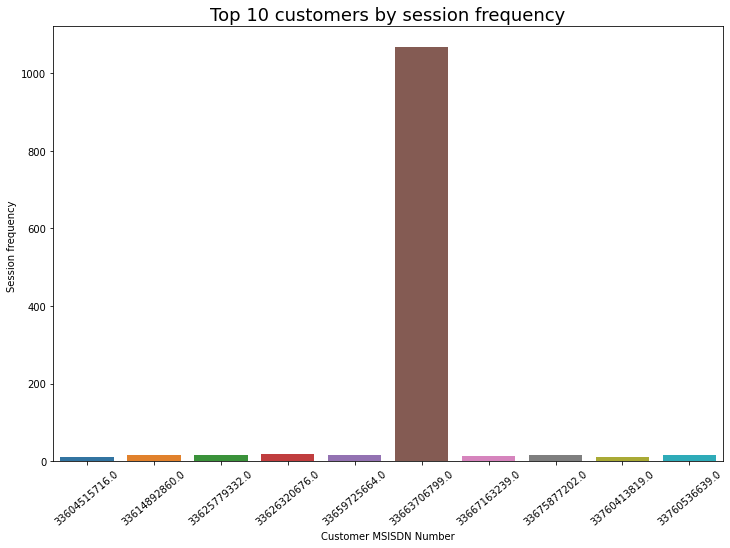

In [288]:
plt.subplots(figsize=(12,8))
sns.barplot(y='bearer_id',x='msisdn/number',data=top10_customers_by_session)
plt.xticks(rotation=40)
plt.xlabel("Customer MSISDN Number")
plt.ylabel("Session frequency ")
plt.title('Top 10 customers by session frequency',fontsize=18)

`Customer 33663706799,33614892860,33625779332 have the highest number of sessions, the data is free of outliers but customer number 33663706799 has got the highest session frequency`

<i>`Top 10 customers based on duration of session`</i>

In [289]:
top10_customers_by_sess_duration=df.groupby('msisdn/number').agg({'dur._(ms)':'sum'}).reset_index().sort_values('dur._(ms)',ascending=False).head(10)
top10_customers_by_sess_duration

,msisdn/number,dur._(ms)
53644,3.366371e+10,72655568.0
13180,3.362578e+10,18553754.0
6437,3.361489e+10,9966898.0
92923,3.376054e+10,9279434.0
13526,3.362632e+10,8791927.0
65118,3.366716e+10,8744914.0
50281,3.366284e+10,6614270.0
57160,3.366469e+10,6288730.0
666,3.360313e+10,6287761.0
66029,3.366746e+10,5649882.0


Text(0.5, 1.0, 'Top 10 customers by duration of sessions')

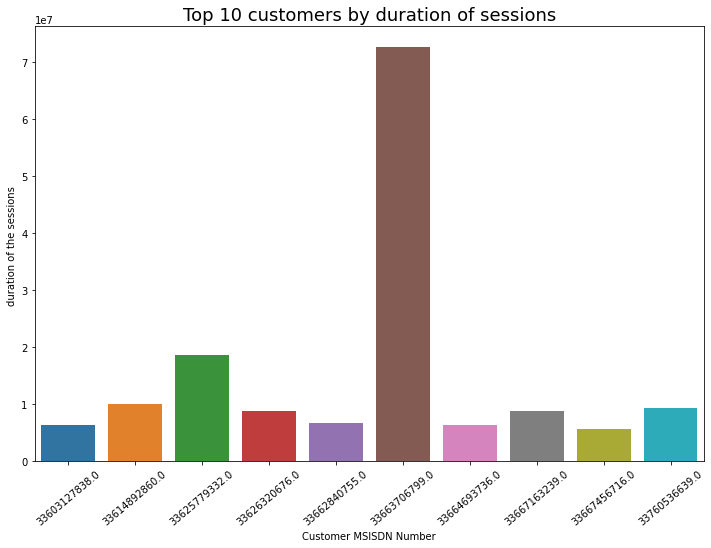

In [290]:
plt.subplots(figsize=(12,8))
sns.barplot(x='msisdn/number',y='dur._(ms)',data=top10_customers_by_sess_duration)
plt.xticks(rotation=40)
plt.xlabel("Customer MSISDN Number")
plt.ylabel("duration of the sessions ")
plt.title('Top 10 customers by duration of sessions',fontsize=18)

<b>`Top 10 customers by total traffic`</b>

In [291]:
top10_cust_traffic=df.groupby('msisdn/number').agg({'total_data':'sum'}).reset_index().sort_values('total_data',ascending=False).head(10)
top10_cust_traffic

,msisdn/number,total_data
53644,3.366371e+10,531963.557517
6437,3.361489e+10,8846.226494
92923,3.376054e+10,8514.773963
13180,3.362578e+10,8499.620722
13526,3.362632e+10,7971.167261
76363,3.367588e+10,7891.110608
37052,3.365973e+10,7705.862783
63028,3.366646e+10,7308.500938
92577,3.376041e+10,7132.370514
57241,3.366471e+10,6872.018208


Text(0.5, 1.0, 'Top 10 customers by traffic')

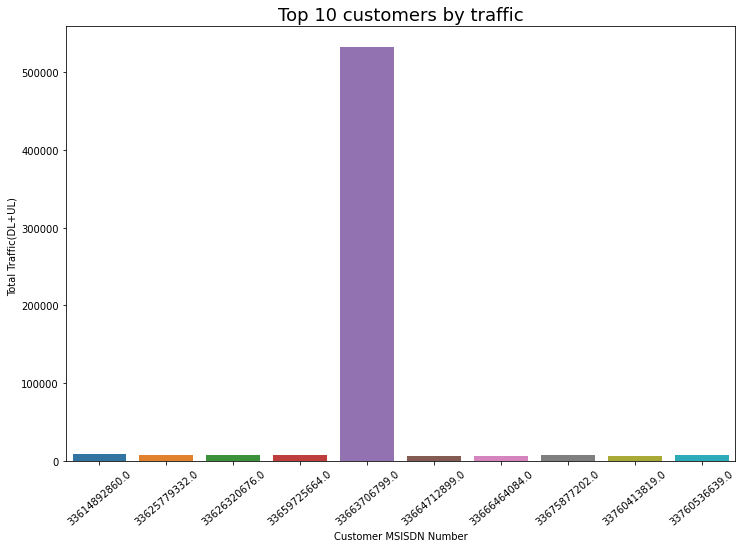

In [292]:
plt.subplots(figsize=(12,8))
sns.barplot(x='msisdn/number',y='total_data',data=top10_cust_traffic)
plt.xticks(rotation=40)
plt.xlabel("Customer MSISDN Number")
plt.ylabel("Total Traffic(DL+UL) ")
plt.title('Top 10 customers by traffic',fontsize=18)

In [293]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [294]:
df["total_social_media_session"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["total_google_session"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['total_email_session'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['total_youtube_session'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['total_netflix_session'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["total_gaming_session"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['total_other_session'] = df["other_dl_(bytes)"]+df["other_ul_(bytes)"]
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

`Aggregate the number of session durations, total session duration, & total data for each user`

In [295]:
df = df.rename( columns={'bearer_id': 'sessions'})

In [296]:
engagement = df.groupby('msisdn/number').agg({'sessions': 'count', 'dur._(ms)': 'sum', 'total_data': 'sum'})

In [314]:
engagement

,sessions,dur._(ms),total_data
msisdn/number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1,8810.0,7.146416e+08
3.379000e+10,1,140988.0,4.803073e+08
3.197021e+12,1,877385.0,2.321240e+08


In [297]:
engagement.head()

,sessions,dur._(ms),total_data
msisdn/number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09


In [298]:
engagement.drop(33663706799.0, axis=0, inplace=True)

<b>`2.1 - Users data analysis`</b>

`Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.`

In [221]:
def normalizer(df, columns):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

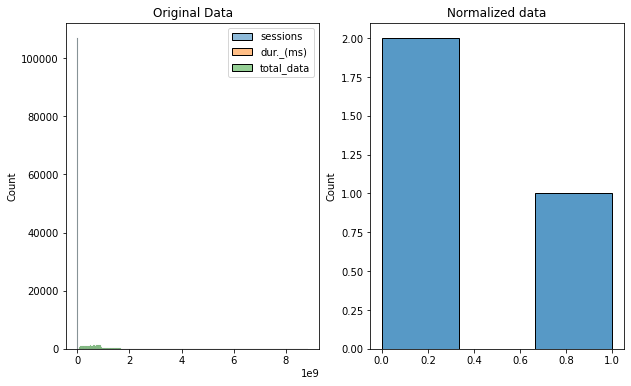

In [226]:
normalized_user_engagement = normalizer(engagement, ['sessions', 'dur._(ms)', 'total_data'] )

In [227]:
normalized_user_engagement.head()

,sessions,dur._(ms),total_data
0,1.138057e-09,0.000133,1.000000
1,6.375122e-09,0.001155,0.999999
2,1.677947e-09,0.000226,1.000000
3,2.367869e-09,0.000118,1.000000
4,1.372297e-09,0.000025,1.000000


In [228]:
normalized_user_engagement.describe()

,sessions,dur._(ms),total_data
count,1.068550e+05,106855.000000,1.068550e+05
mean,2.827708e-09,0.000290,9.999999e-01
std,2.274851e-09,0.000352,5.873167e-07
min,1.051789e-09,0.000008,9.999429e-01
25%,1.482800e-09,0.000110,9.999999e-01
50%,2.009635e-09,0.000190,1.000000e+00
75%,3.151055e-09,0.000334,1.000000e+00
max,3.007606e-08,0.010688,1.000000e+00


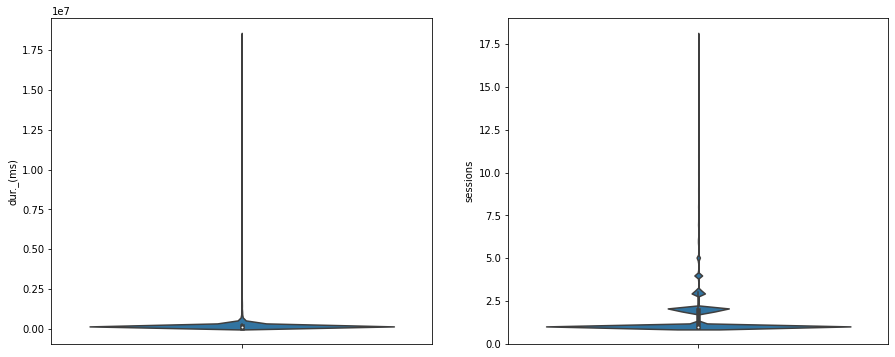

In [229]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.violinplot(y=user_engagement["dur._(ms)"])
# sns.boxplot(y=user_engagement["dur._(ms)"], color="red")
plt.subplot(1,2,2)
sns.violinplot(y=user_engagement["sessions"])
# sns.boxplot(y=user_engagement["total_data"])
plt.show()

<b>`K-means clustering (K=3)`</b>

In [231]:
normalized = normalized_user_engagement.copy()

In [236]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(normalized)
centroids = kmeans.cluster_centers_

In [237]:
centroids_eng = kmeans.cluster_centers_
centroids_eng

array([[2.23950244e-09, 1.78197219e-04, 9.99999979e-01],
       [9.83257001e-09, 2.09334508e-03, 9.99997390e-01],
       [5.38445044e-09, 7.23172942e-04, 9.99999711e-01]])

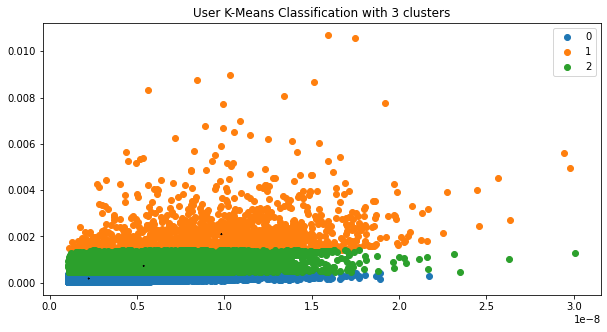

In [272]:
lables_unique = np.unique(label)
#plotting the results:
plt.figure(figsize=(10,5))
plt.title('User K-Means Classification with 3 clusters')
for i in lables_unique:
    plt.scatter(normalized[label == i].iloc[:,0] , normalized[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1],centroids[:,2], marker='x', color = 'black')
plt.legend()
plt.show()

In [238]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = normalized.copy()
df_segm_kmeans['Segment_K-means'] = kmeans.labels_

<b>`Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text`</b>

In [240]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment_K-means']).agg(['min', 'max', 'mean', 'sum'])
df_segm_analysis

sessions                                       dur._(ms)  \
                          min           max          mean       sum       min   
Segment_K-means                                                                 
0                1.051789e-09  2.171671e-08  2.239813e-09  0.000200  0.000008   
1                1.124412e-09  2.978296e-08  9.836654e-09  0.000018  0.001408   
2                1.069190e-09  3.007606e-08  5.387854e-09  0.000084  0.000451   

                                               total_data                      \
                      max      mean        sum        min       max      mean   
Segment_K-means                                                                 
0                0.000451  0.000178  15.940291   1.000000  1.000000  1.000000   
1                0.010688  0.002095   3.737957   0.999943  0.999999  0.999997   
2                0.001408  0.000724  11.326805   0.999999  1.000000  1.000000   

                               
                          sum  
Segment_K-means                
0                89420.998082  
1                 1783.995336  
2                15649.995464

`Mean for each cluster`

In [242]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment_K-means']).mean()
df_segm_analysis

,sessions,dur._(ms),total_data
Segment_K-means,,,
0,2.239813e-09,0.000178,1.000000
1,9.836654e-09,0.002095,0.999997
2,5.387854e-09,0.000724,1.000000


`Minimum for each cluster`

In [243]:
# Calculate min values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment_K-means']).min()
df_segm_analysis

,sessions,dur._(ms),total_data
Segment_K-means,,,
0,1.051789e-09,0.000008,1.000000
1,1.124412e-09,0.001408,0.999943
2,1.069190e-09,0.000451,0.999999


`The least xDR Session occured in cluster 0 and 2, they also has the least amount of session duration.`

<b>`Maximum for each cluster`</b>

In [247]:
# Calculate max values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment_K-means']).max()
df_segm_analysis

,sessions,dur._(ms),total_data
Segment_K-means,,,
0,2.171671e-08,0.000451,1.000000
1,2.978296e-08,0.010688,0.999999
2,3.007606e-08,0.001408,1.000000


<b>`Sum total for each cluster`</b>

In [248]:
# Calculate sum values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment_K-means']).sum()
df_segm_analysis

,sessions,dur._(ms),total_data
Segment_K-means,,,
0,0.000200,15.940291,89420.998082
1,0.000018,3.737957,1783.995336
2,0.000084,11.326805,15649.995464


In [251]:
# Compute the size and proportions of the three clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment_K-means', 'sessions']].groupby(['Segment_K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()
df_segm_analysis

,sessions,dur._(ms),total_data,N Obs,Prop Obs
Segment_K-means,,,,,
0,0.000200,15.940291,89420.998082,89421,0.836844
1,0.000018,3.737957,1783.995336,1784,0.016696
2,0.000084,11.326805,15649.995464,15650,0.146460


<b>`Many of the customers are grouped either in cluster 0 and 2`</b>

In [252]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         })

,sessions,dur._(ms),total_data,N Obs,Prop Obs
Segment_K-means,,,,,
well-off,0.000200,15.940291,89420.998082,89421,0.836844
fewer-opportunities,0.000018,3.737957,1783.995336,1784,0.016696
standard,0.000084,11.326805,15649.995464,15650,0.146460


In [257]:
eng = engagement.copy()

In [258]:
eng.insert(0, 'cluster', kmeans.labels_)
eng.head(5)

,cluster,sessions,dur._(ms),total_data
msisdn/number,,,,
3.360100e+10,0,1,116720.0,8.786906e+08
3.360100e+10,2,1,181230.0,1.568596e+08
3.360100e+10,0,1,134969.0,5.959665e+08
3.360101e+10,0,1,49878.0,4.223207e+08
3.360101e+10,0,2,37104.0,1.457411e+09


In [262]:
cluster1 = eng[eng["cluster"]==0]
cluster1.describe()

,cluster,sessions,dur._(ms),total_data
count,89421.0,89421.000000,8.942100e+04,8.942100e+04
mean,0.0,1.416177,1.271017e+05,7.600791e+08
std,0.0,0.787618,1.116813e+05,4.652241e+08
min,0.0,1.000000,7.142000e+03,4.604748e+07
25%,0.0,1.000000,5.766700e+04,4.598530e+08
50%,0.0,1.000000,9.286700e+04,6.825232e+08
75%,0.0,2.000000,1.674660e+05,8.867387e+08
max,0.0,11.000000,2.927785e+06,6.872018e+09


In [264]:
cluster2 = eng[eng["cluster"]==1]
cluster2.describe()

,cluster,sessions,dur._(ms),total_data
count,1784.0,1784.000000,1.784000e+03,1.784000e+03
mean,1.0,1.093049,3.113612e+05,1.568294e+08
std,0.0,0.664184,6.122550e+05,3.152900e+08
min,1.0,1.000000,8.164400e+04,3.357584e+07
25%,1.0,1.000000,1.563855e+05,8.162286e+07
50%,1.0,1.000000,2.005995e+05,1.035561e+08
75%,1.0,1.000000,2.993055e+05,1.449027e+08
max,1.0,17.000000,1.855375e+07,8.499621e+09


In [265]:
cluster3 = eng[eng["cluster"]==2]
cluster3.describe()

,cluster,sessions,dur._(ms),total_data
count,15650.0,15650.000000,1.565000e+04,1.565000e+04
mean,2.0,1.300192,2.362736e+05,3.569591e+08
std,0.0,0.905098,3.314413e+05,4.765303e+08
min,2.0,1.000000,1.976400e+04,3.324901e+07
25%,2.0,1.000000,1.022472e+05,1.471128e+08
50%,2.0,1.000000,1.588745e+05,2.242001e+08
75%,2.0,1.000000,2.455132e+05,3.705002e+08
max,2.0,18.000000,9.966898e+06,8.846226e+09


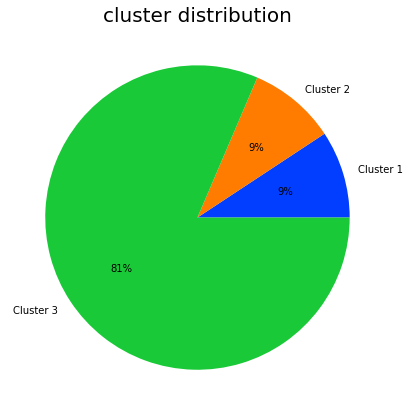

In [271]:
data = [cluster1.sessions.count(), cluster2.sessions.count(), cluster3.sessions.count()]
keys = ['Cluster 1', 'Cluster 2', 'Cluster 3']
plt.figure(figsize=(12, 7))
colors = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=colors, autopct='%.0f%%')
plt.title('cluster distribution', size=20)
plt.show()

In [274]:
df.columns

Index(['sessions', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 

<i>`Aggregate user total traffic per application and derive the top 10 most engaged users per application`</i>

In [275]:
user_app_usage = df.groupby(
    'msisdn/number').agg({ 'total_social_media_session': 'sum', 'total_gaming_session': 'sum', 'total_youtube_session': 'sum', 'total_netflix_session': 'sum', 'total_google_session': 'sum', 'total_email_session': 'sum', 'total_other_session': 'sum'})

In [276]:
user_app_usage.head()

,total_social_media_session,total_gaming_session,total_youtube_session,total_netflix_session,total_google_session,total_email_session,total_other_session
msisdn/number,,,,,,,
3.360100e+10,2232135.0,8.124587e+08,21624548.0,27180981.0,4389005.0,1331362.0,386570872.0
3.360100e+10,2660565.0,1.197501e+08,12432223.0,11221763.0,5334863.0,3307781.0,281710071.0
3.360100e+10,3195623.0,5.388277e+08,21333570.0,19353900.0,3443126.0,3205380.0,501693672.0
3.360101e+10,280294.0,3.911261e+08,6977321.0,1942092.0,9678493.0,2284670.0,35279702.0
3.360101e+10,2912542.0,1.314798e+09,41533002.0,49201724.0,18499616.0,3305469.0,804804484.0


<b>`Top 10 most engaged users per application`</b>

In [318]:
# Drop an outlier
user_app_usage.drop(33663706799.0, axis=0, inplace=True)

In [319]:
social_media = user_app_usage.nlargest(10, "total_social_media_session")['total_social_media_session']
gaming = user_app_usage.nlargest(10, "total_gaming_session")['total_gaming_session']
youtube = user_app_usage.nlargest(10, "total_youtube_session")['total_youtube_session']
netflix = user_app_usage.nlargest(10, "total_netflix_session")['total_netflix_session']
google = user_app_usage.nlargest(10, "total_google_session")['total_google_session']
email = user_app_usage.nlargest(10, "total_email_session")['total_email_session']
other = user_app_usage.nlargest(10, "total_other_session")['total_other_session']

In [320]:
social_media_df = pd.DataFrame()
social_media_df['User_ID'] = social_media.index
social_media_df['total_social_media_session'] = social_media.values
gaming_df = pd.DataFrame()
gaming_df['User_ID'] = gaming.index
gaming_df['total_gaming_session'] = gaming.values
youtube_df = pd.DataFrame()
youtube_df['User_ID'] = youtube.index
youtube_df['total_youtube_session'] = youtube.values

netflix_df = pd.DataFrame()
netflix_df['User_ID'] = netflix.index
netflix_df['total_netflix_session'] = netflix.values
google_df = pd.DataFrame()
google_df['User_ID'] = google.index
google_df['total_google_session'] = google.values
email_df = pd.DataFrame()
email_df['User_ID'] = email.index
email_df['total_email_session'] = email.values
others_df = pd.DataFrame()
others_df['User_ID'] = other.index
others_df['total_other_session'] = other.values

<b>`Top 10 most engaged users per application`</b>

[]

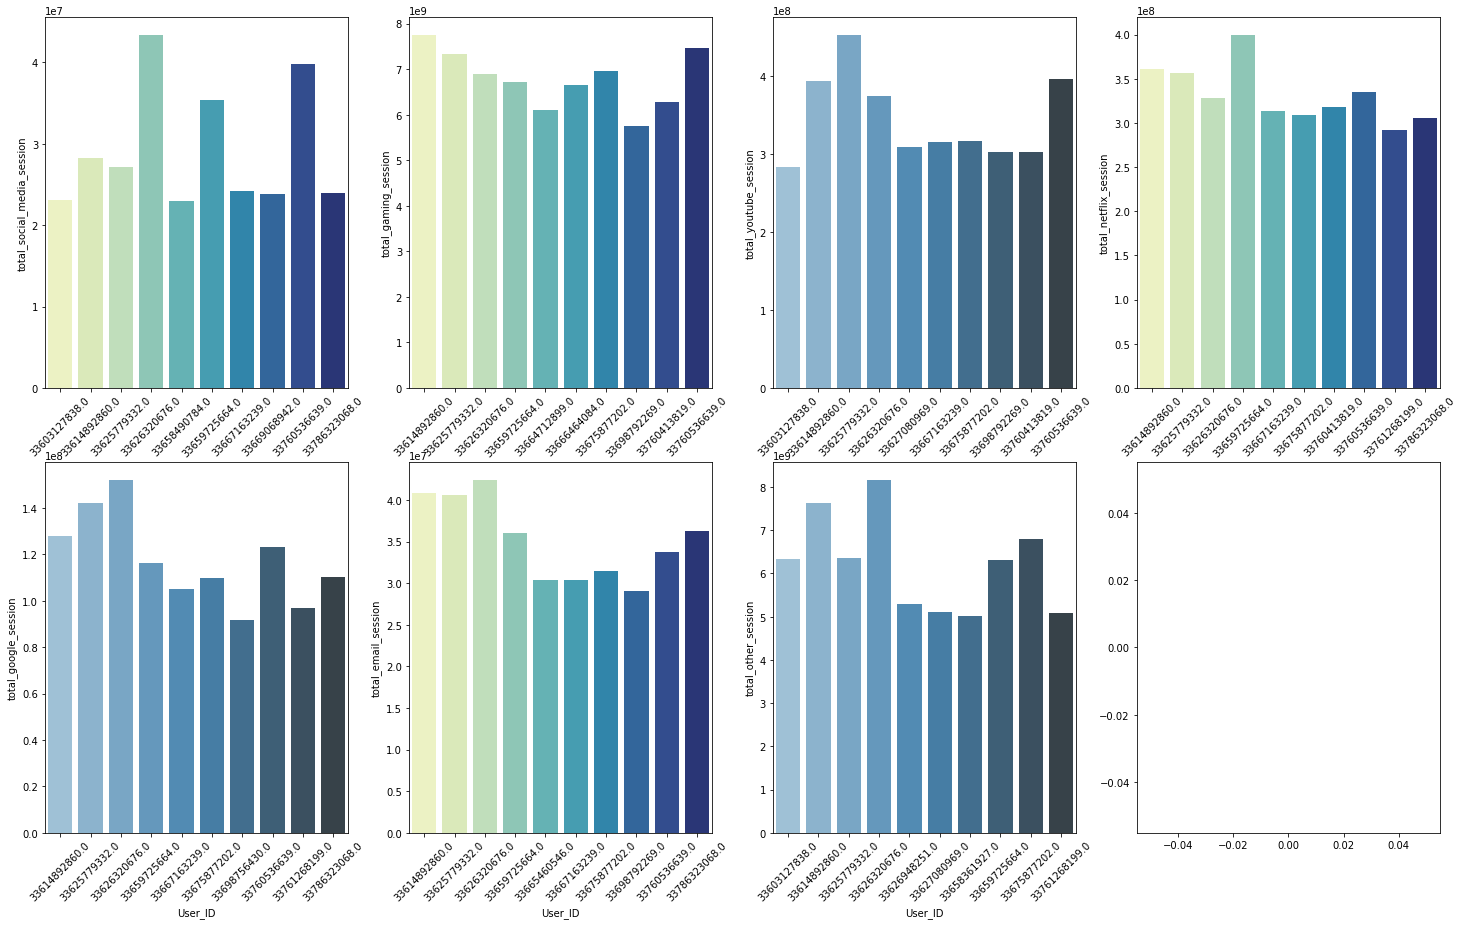

In [324]:
f, axes = plt.subplots(2, 4, figsize=(25, 15))
ax1 = sns.barplot(data=social_media_df, x='User_ID', orient='v', y='total_social_media_session', ax=axes[0,0], palette='YlGnBu')
ax2 = sns.barplot(data=gaming_df, x='User_ID',orient='v', y='total_gaming_session', ax=axes[0,1], palette='YlGnBu')
ax3 = sns.barplot(data=youtube_df, x='User_ID',orient='v', y='total_youtube_session', ax=axes[0,2], palette='Blues_d')
ax4 = sns.barplot(data=netflix_df, x='User_ID',orient='v', y='total_netflix_session', ax=axes[0,3], palette='YlGnBu')
ax5 = sns.barplot(data=google_df, x='User_ID',orient='v', y='total_google_session', ax=axes[1,0], palette='Blues_d')
ax6 = sns.barplot(data=email_df, x='User_ID',orient='v', y='total_email_session', ax=axes[1,1], palette='YlGnBu')
ax7 = sns.barplot(data=others_df, x='User_ID',orient='v', y='total_other_session', ax=axes[1,2], palette='Blues_d')
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=45)
ax3.set_xticklabels(ax3.xaxis.get_majorticklabels(), rotation=45)
ax4.set_xticklabels(ax4.xaxis.get_majorticklabels(), rotation=45)
ax5.set_xticklabels(ax5.xaxis.get_majorticklabels(), rotation=45)
ax6.set_xticklabels(ax6.xaxis.get_majorticklabels(), rotation=45)
ax7.set_xticklabels(ax7.xaxis.get_majorticklabels(), rotation=45)
plt.plot()

<b>`Plot the top 3 most used applications using appropriate charts.`</b>

In [325]:
top_used_applications = user_app_usage.sum()

In [326]:
top_used_applications.values

array([2.72265161e+11, 6.40887608e+13, 3.37219431e+12, 3.37003150e+12,
       1.16285129e+12, 3.36463983e+11, 6.39535788e+13])

In [327]:
top_3_used = top_used_applications.nlargest(3)
top_3_used

total_gaming_session     6.408876e+13
total_other_session      6.395358e+13
total_youtube_session    3.372194e+12
dtype: float64

In [ ]:
top_3_used, ["Netflix", "Email", "Gaming"], top_3_used.values, , , 

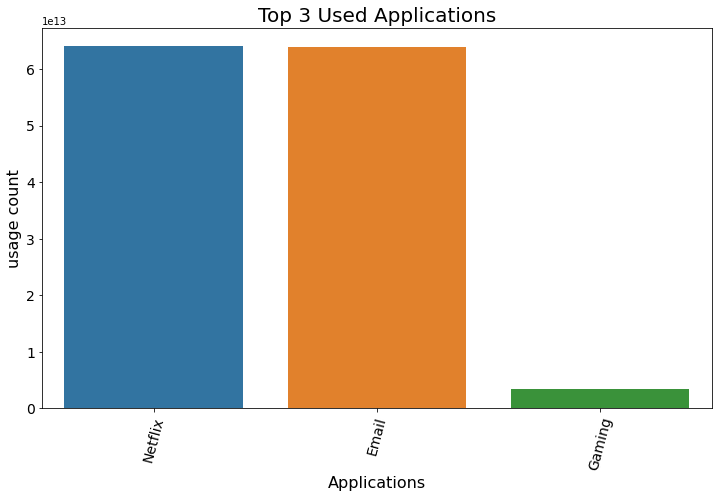

In [336]:
plt.figure(figsize=(12, 7))
sns.barplot(data=top_3_used, x=["Netflix", "Email", "Gaming"], y=top_3_used.values)
plt.title(label = "Top 3 Used Applications", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel = "Applications", fontsize=16)
plt.ylabel(ylabel = 'usage count', fontsize=16)
plt.show()

In [338]:
inertias = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(normalized)
    inertias.append(kmeans.inertia_)

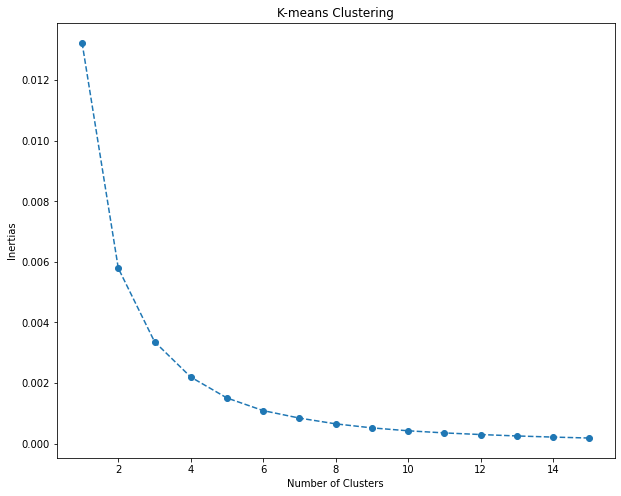

In [339]:
# Plotting the cluster size vs. inertia graph to find the optimal cluster
plt.figure(figsize = (10,8))
plt.plot(range(1, 16), inertias, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('K-means Clustering')
plt.show()

In [343]:
kl = KneeLocator(range(0, 15), inertias, curve="convex", direction="decreasing")
kl.elbow

3

<i>`Using the elbow method, the optimal number of cluster is 3, which is the number of cluster I used above in the k-means clustering.`</i>

In [341]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = normalized.copy()
df_segm_kmeans['Segment_K-means'] = kmeans.labels_

In [342]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment_K-means']).mean()
df_segm_analysis

,sessions,dur._(ms),total_data
Segment_K-means,,,
0,6.959865e-09,0.000969,1.000000
1,1.930352e-09,0.000128,1.000000
2,1.102266e-08,0.002848,0.999996
3,3.483220e-09,0.000414,1.000000
4,9.242371e-09,0.001618,0.999999
5,4.410585e-09,0.000563,1.000000
6,2.783886e-09,0.000297,1.000000
7,1.021627e-08,0.002131,0.999998
8,1.120830e-08,0.005630,0.999984


In [347]:
import pickle
with open("../models/user_engagement.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [344]:
normalized.to_csv('../data/normalized_data.csv')

In [345]:
eng.to_csv('../data/user_engagement.csv')